In [ ]:
from labjack_device import LabJackDevice
from _ljm_aux import *

lj_device = LabJackDevice(
        device_type=LabJackDeviceTypeEnum.T7,
        connection_type=LabJackConnectionTypeEnum.ETHERNET,
        device_identifier='192.168.1.128',
    )

# working
stream_in = lj_device.stream_in(["AIN0", "AIN1"], 10, sampling_rate_Hz=50e3, scans_per_read=50000)
# too high sampling rate
# stream_in = lj_device.stream_in(["AIN0", "AIN1"], 10, sampling_rate_Hz=100e3, scans_per_read=50000)

print(stream_in)
print()
total_nans = np.sum([np.isnan(value['V']).sum() for value in stream_in.records.values()])
print(f"Recounting skipped total samples = {total_nans}")
del lj_device

>>> Connecting to LabJack... Done. Execution time: 0.006010 s

LabJack device instance:
	Device type: T7
	Connection type: ETHERNET
	IP address: 192.168.1.128, Port: (502,)
	Serial number: 470033287
	Max bytes per MB: 1040

>>> Configuring LabJack for streaming... Done. Execution time: 0.000988 s



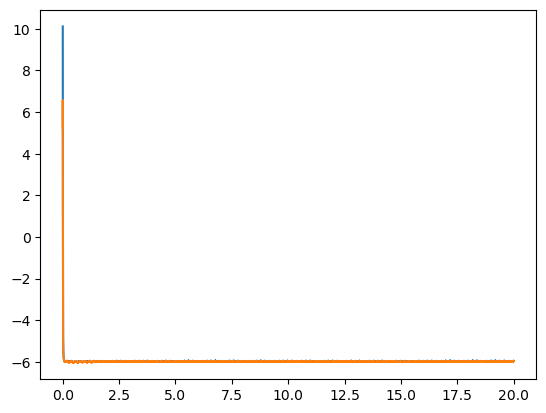

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for channel, record in stream_in.records.items():
    ax.plot(record["t"], record["V"], label=channel)

    

AttributeError: 'StreamIn' object has no attribute '_total_a_data'

In [ ]:
V = stream_in.records["AIN0"]["V"]
print(V[V < -20])


[-9999. -9999. -9999. ... -9999. -9999. -9999.]
